# Table of Content - Customer Service Study

### [Lab case Study](#00)

### [Libraries](#000)

### [Pipeline](#0):


### [Plotting](#15)


### [Statistic tasks](#aa)


### [Processing Data](#f)


### [Linear Regression](#g)


### [Model Validation](#h)


# Lab Case Study <a class="anchor" id="00"></a>

### Scenario

You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Business Objectives

- Retain customers,
- analyze relevant customer data,
- develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Activities

Refer to the `Activities.md` file where you will find guidelines for some of the activities that you want to do.

### Data

The csv files is provided in the folder. The columns in the file are self-explanatory.

----

# Libraries <a class="anchor" id="000"></a>

In [103]:

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from numpy import random
#import getpass #just needed for sql import
#import sqlalchemy as sa #just needed for sql import
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

# Pipeline <a class="anchor" id="0"></a>
Functions & Pipeline

In [104]:
#cleaning the state names
def st_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        states= {'Arizona' : 'AZ', 
                 'California': 'CA',
                 'Nevada' : 'NV', 
                 'Cali' :'CA,', 
                 'Oregon':'OR', 
                 'AZ' :'AZ', 
                 'WA':'WA',
                 'Washington':'WA',
                 'Cali':'CA'}
        
        return states[x]

In [105]:
#cleaning the gender names
def gender_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        g = {'F': 'F', 
                 'M' : 'M', 
                 'Femal': 'F',
                 'Male' : 'M', 
                 'female' :'F'}
        
        return g[x]

In [106]:
#change states into regions
def state_region(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        region= {'AZ': 'Central', 
                  'CA': 'West',
                 'NV': 'Central', 
                 'OR':'North West', 
                  'AZ':'Central', 
                 'WA':'East'}
        
        return region[x]
    

In [107]:
# loading csv into dataframe
def load_data(path):
    return pd.read_csv(path)

#cleaning

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns] #all columns in lower case
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer"]) #dropping useless columns
    #df=df.dropna(how = 'all') #dropping empty rows
    #df=df[df['income']>0]
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce') # change format of date
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"])) #get frm effective_to_date just the months
    df=df.drop(columns=['effective_to_date']) #dropping not anymore needed column
    df["state"] = df["state"].apply(st_clean)
    df["gender"] = df["gender"].apply(gender_clean)
    df =df.drop_duplicates()
    df['customer_lifetime_value'].fillna(df["customer_lifetime_value"].mean(),inplace=True) # filling empty cells with the mean
    df['income'].fillna(df["income"].mean(),inplace=True)
    df['monthly_premium_auto'].fillna(df["monthly_premium_auto"].mean(),inplace=True)
    df['total_claim_amount'].fillna(df["total_claim_amount"].mean(),inplace=True)
    df['number_of_open_complaints'].fillna(df["number_of_open_complaints"].mean(),inplace=True)
    df["total_claim_amount"]=round(df["total_claim_amount"],0) #remove decimals
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0) #remove decimals
    df["number_of_open_complaints"]=round(df['number_of_open_complaints'],0) #remove decimals
    df = df.reset_index(drop=True) #reset index
    #df["state"] = df["state"].apply(st_region) # change states into region
    return df



In [108]:
cs_study =load_data("Data_Marketing_Customer_Analysis_Round2.csv")

In [109]:
cs_study = clean_data(cs_study)

In [110]:
cs_study.head(3)


,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,AZ,4809.0,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,CA,2229.0,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,WA,14948.0,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,February


In [ ]:
#cs_study.to_csv(".../cs_study_clean.csv")

# Plotting <a class="anchor" id="15"></a>


## Show a plot of the total number of responses.<a class="anchor" id="16"></a>

In [11]:
response = cs_study['response'].value_counts()
response

No     8782
Yes    1297
Name: response, dtype: int64

<AxesSubplot:title={'center':'Number of responses'}, ylabel='response'>

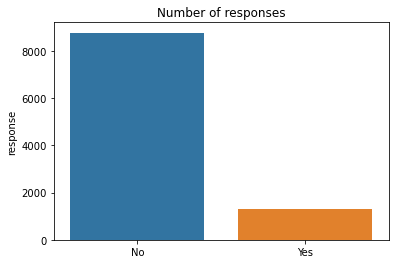

In [54]:
# create figure and axes
# subplots()
fig1, ax1 = plt.subplots()
# set title
# set_title()
ax1.set_title("Number of responses")
# plot the bar chart
# bar()


sns.barplot(x=response.index ,y =response)

## Show a plot of the response rate by the sales channel.<a class="anchor" id="17"></a>

In [55]:
#size includes NaN values, count does not:
response_channel = cs_study.groupby(['sales_channel','response']).size().reset_index(name='total')
response_channel

,sales_channel,response,total
0,Agent,No,3136
1,Agent,Yes,655
2,Branch,No,2531
3,Branch,Yes,292
4,Call Center,No,1787
5,Call Center,Yes,192
6,Web,No,1328
7,Web,Yes,158


<AxesSubplot:title={'center':'Response by channel'}, xlabel='response', ylabel='total'>

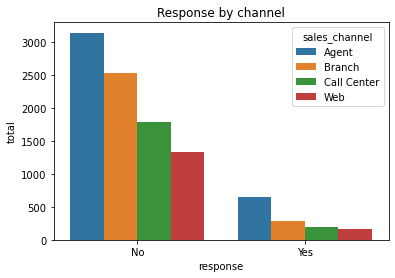

In [56]:
# Start with the usual matplotlib subplots() function
fig2, ax2 = plt.subplots()

# set the title using: set_title()
ax2.set_title("Response by channel")

# uses seaborn barplot
sns.barplot(x = response_channel['response'], y = response_channel['total'],hue = response_channel['sales_channel'])


## Show a plot of the response rate by the total claim amount.<a class="anchor" id="18"></a>

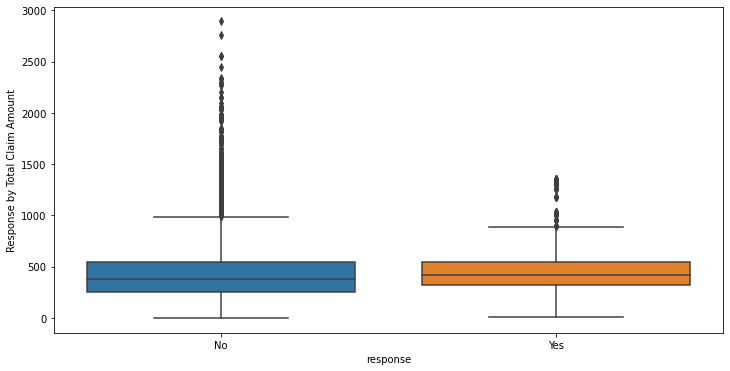

In [57]:
#boxplot solution
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=cs_study)
plt.ylabel('Response by Total Claim Amount')
plt.show()

## Show a plot of the response rate by income.<a class="anchor" id="19"></a>

In [58]:
response_income = cs_study.groupby(['response','income']).size().reset_index(name='total')
response_income

,response,income,total
0,No,0,2383
1,No,10037,1
2,No,10074,1
3,No,10097,2
4,No,10105,1
...,...,...,...
5699,Yes,95697,12
5700,Yes,96306,6
5701,Yes,97131,6
5702,Yes,97361,6


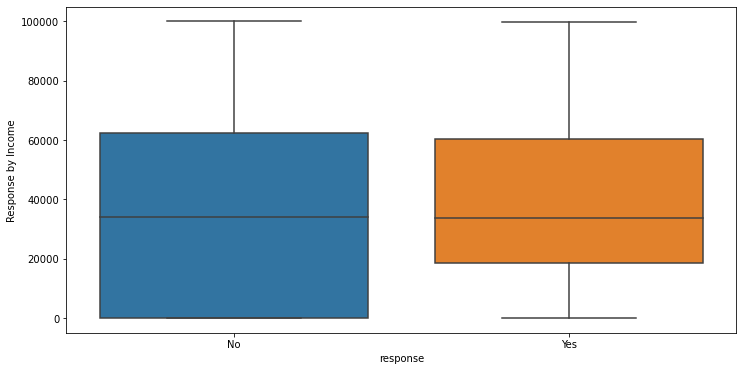

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=cs_study)
plt.ylabel('Response by Income')
plt.show()

5. Don't Limit your creativity!  plot Any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed. <a class="anchor" id="20"></a>

In [ ]:
#tba

## Plot the Correlation Heatmap. <a class="anchor" id="21"></a>

In [ ]:
#tba

# Statistic Tasks  <a class="anchor" id="aa"></a>

## Check the data types of the columns. <a class="anchor" id="a"></a>
Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [111]:
numerical= cs_study.select_dtypes(include=np.number)
numerical.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61,7.0,52,0.0,9,293.0
1,2229.0,0,64,3.0,26,0.0,1,745.0


In [112]:
#numerical.info()

In [113]:
categorical = cs_study.select_dtypes(include=object)
categorical.head(2)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,AZ,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,February
1,CA,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,January


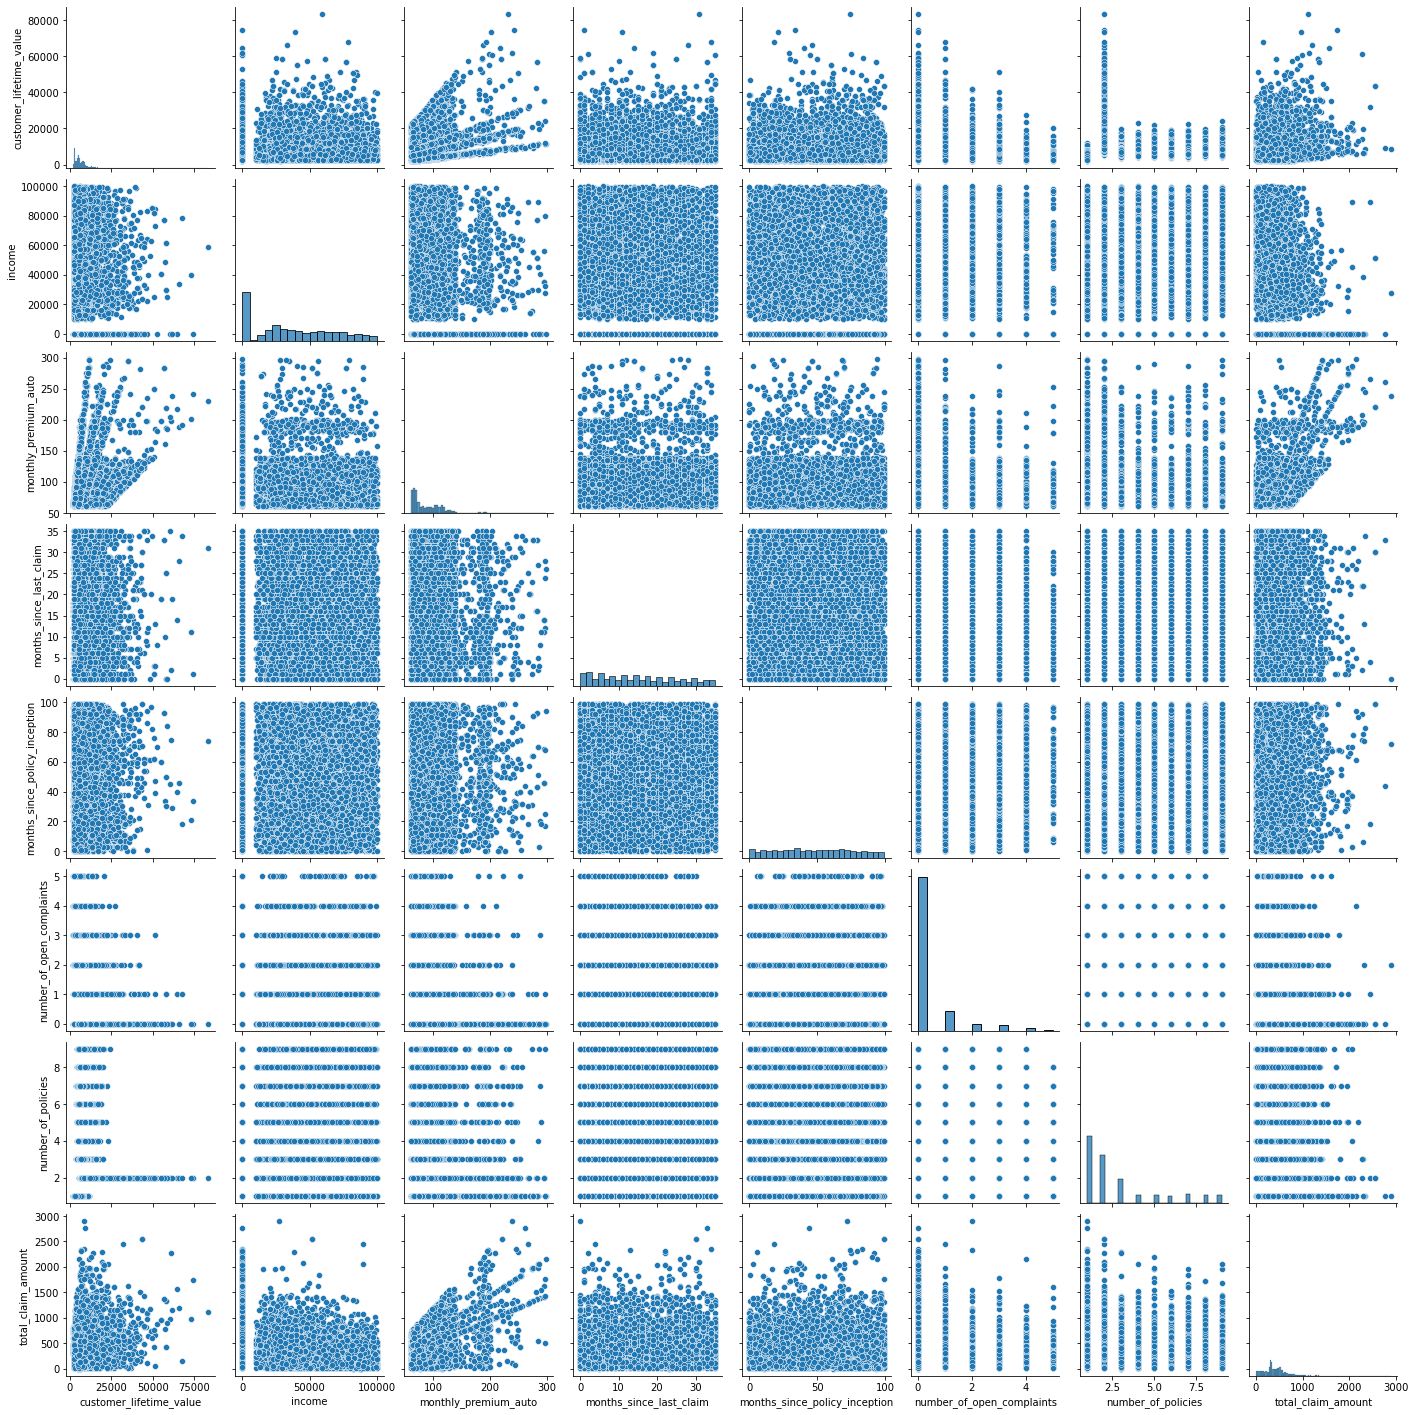

In [114]:
##Use seaborn library to construct distribution plots for the numerical variables##
sns.pairplot(cs_study)
plt.show()

## Visualization normality of the numerical variables  <a class="anchor" id="b"></a>
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 

/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

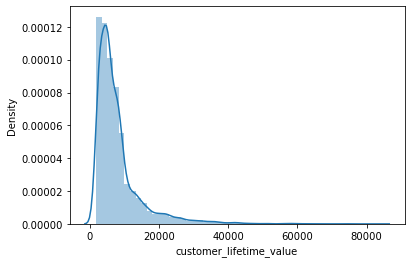

In [115]:
#customer_lifetime_value
sns.distplot(numerical.customer_lifetime_value,hist=True)

/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


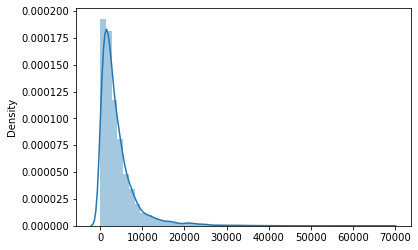

In [116]:
sns.distplot(random.uniform(numerical.customer_lifetime_value), hist=True)

plt.show()


/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


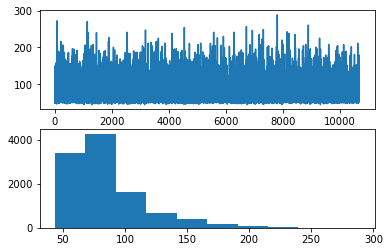

In [117]:
#square root transfotmation
from matplotlib import pyplot
from numpy import sqrt

transform = numerical.customer_lifetime_value = sqrt(numerical.customer_lifetime_value)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

In [118]:
##log transformation
#tba

Mean=84.044, Standard Deviation=30.805


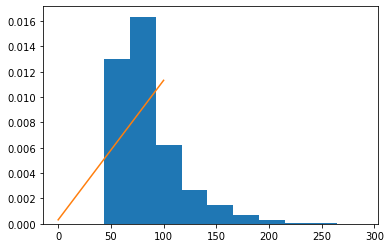

In [119]:
## customer_lifetime_value
# calculate parameters
numerical_mean = np.mean(numerical.customer_lifetime_value)
numerical_std = np.std(numerical.customer_lifetime_value)
print('Mean=%.3f, Standard Deviation=%.3f' % (numerical_mean, numerical_std))

#define the distribution
dist = sc.stats.norm(numerical_mean, numerical_std)

# sample probabilities for a range of outcomes
values = [value for value in (0,100)]
probabilities = [dist.pdf(value) for value in values]

# plot the histogram and pdf
plt.hist(numerical.customer_lifetime_value, bins=10, density=True)
plt.plot(values, probabilities)

##tba

## Normalize (numericals)  <a class="anchor" id="c"></a>

In [120]:

from sklearn import preprocessing

x = numerical.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numerical_normalized = pd.DataFrame(x_scaled)
numerical_normalized

,0,1,2,3,4,5,6,7
0,0.105188,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101279
1,0.014877,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257518
2,0.321084,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165918
3,0.431967,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167300
4,0.209853,0.236795,0.236287,NaN,0.313131,0.0,0.750,0.244729
...,...,...,...,...,...,...,...,...
10684,0.331242,0.000000,0.810127,NaN,0.404040,0.0,0.750,0.419634
10685,0.118130,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.094366
10686,0.452917,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.131697
10687,0.268674,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0.213619


In [121]:
numerical.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10071.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,84.044264,37528.735710,93.190196,15.146063,48.100571,0.362522,2.980821,434.692581
std,30.806924,30405.487111,34.413111,10.085061,27.934300,0.888962,2.399497,292.527849
min,43.566042,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,63.356136,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,269.000000
50%,76.000000,33837.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,94.820884,62291.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.000000
max,288.660700,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


## Multicollinearity between numerical features.  <a class="anchor" id="d"></a>
Please note that we will use the column `total_claim_amount` later as the target variable. 

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.036551   
income                                        0.036551  1.000000   
monthly_premium_auto                          0.435229 -0.009402   
months_since_last_claim                       0.011100 -0.023059   
months_since_policy_inception                 0.012069 -0.006176   
number_of_open_complaints                    -0.035475  0.009207   
number_of_policies                            0.097224 -0.010742   
total_claim_amount                            0.246561 -0.355252   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.435229                 0.011100   
income                                    -0.009402                -0.023059   
monthly_premium_auto                       1.000000                 0.009066   
months_since_last_claim                    0.009066                

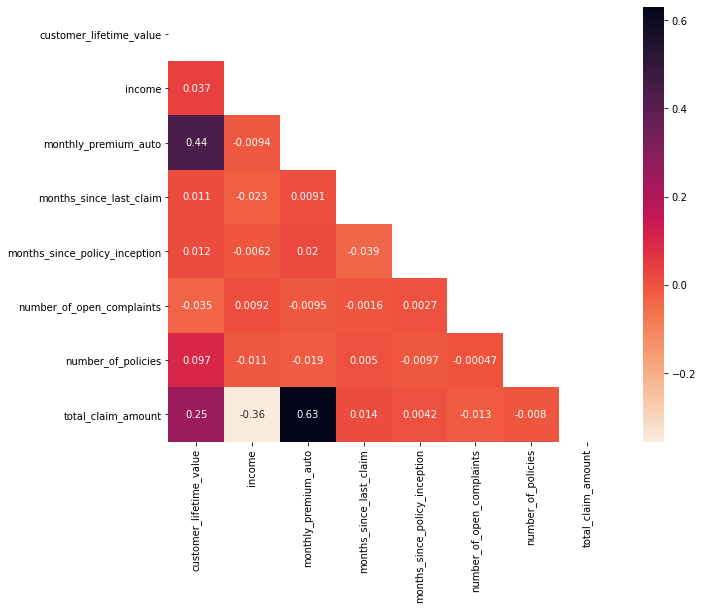

In [122]:
# solution from Raafat:
correlations = numerical.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

5. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [123]:
# no high correlation detected

## Processing Data  <a class="anchor" id="f"></a>
1. X-y split.
2. Normalize (numerical). (done)
3. One Hot/Label Encoding (categorical).
4. Concat DataFrames

1. X-y split.


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
cs_study.head(2)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,AZ,4809.0,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,CA,2229.0,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,January


In [49]:
#x = independent variable
#y = dependent variable

x = cs_study[["customer_lifetime_value", "number_of_open_complaints"]]
y =  cs_study["total_claim_amount"]
#x.head(3)

In [50]:
#test_size = percentage we keep to test, here 30%
#random_state = 10 --> keep the random numbers and not generating everytime new ones

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)
#x_train

In [51]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
predictions = lm.predict(x_test)
predictions


array([383.14336352, 409.32782382, 400.02214049, ..., 391.83425696,
       385.69567306, 409.19741384])

In [52]:
model.score(x_test,y_test)

0.06282636718000068

In [53]:
model.coef_
print(model.intercept_)



359.65093773525007


3. One Hot/Label Encoding (categorical).


In [71]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [137]:
#encoding the data
enc = OneHotEncoder(handle_unknown='ignore')
X = [categorical.policy_type, categorical.policy]
enc.fit(X)

#enc.fit_transform(np.array(categorical.loc[:,["policy_type", "marital_status"]])).toarray()
                  
                  

OneHotEncoder(handle_unknown='ignore')

In [73]:
OneHotEncoder(handle_unknown='ignore')
enc.categories_

[array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object)]

In [135]:
categorical_numerical =pd.get_dummies(categorical)
#categorical_numerical


4. Concat DataFrames

In [133]:
cs_study_normalized =numerical_normalized.join(categorical, lsuffix="_left")

In [134]:
cs_study_normalized
#P: no header names for numerical data

,0,1,2,3,4,5,state,response,coverage,education,...,marital_status,months_since_last_claim,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,0.002579,0.000000,0.000000,0.919192,0.000,0.121583,,,Basic,Bachelor,...,Single,8.0,0,Personal Auto,Personal L2,Offer1,Agent,Two-Door Car,Medsize,nan
1,0.003009,0.000000,0.016878,0.717172,0.000,0.237346,,,Basic,Bachelor,...,Single,3.0,0,Corporate Auto,Corporate L1,Offer4,Web,Two-Door Car,Medsize,nan
2,0.003095,0.000000,0.000000,0.313131,0.000,0.101171,,,Basic,High School or Below,...,Single,28.0,0,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Medsize,nan
3,0.004016,0.000000,0.029536,0.040404,0.000,0.112784,,,Basic,College,...,Single,3.0,0,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Medsize,nan
4,0.004040,0.279773,0.000000,0.383838,0.000,0.101171,,,Basic,High School or Below,...,Married,7.0,0,Personal Auto,Personal L3,Offer3,Web,Four-Door Car,Medsize,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,0.505103,0.593603,0.244726,0.414141,0.125,0.076710,Washington,No,Basic,Master,...,Married,15.0,0,Personal Auto,Personal L3,Offer2,Web,SUV,Medsize,nan
10772,0.522800,0.329543,0.278481,0.464646,0.125,0.493883,Washington,No,Extended,High School or Below,...,Single,20.0,1.0,Personal Auto,Personal L2,Offer1,Call Center,SUV,Medsize,A
10773,0.526521,0.000000,0.295359,0.595960,0.125,0.291134,Washington,No,Extended,High School or Below,...,Married,20.0,0,Personal Auto,Personal L3,Offer3,Agent,SUV,Medsize,A
10774,0.787552,0.334874,0.535865,0.464646,0.125,0.412974,Washington,No,Basic,Bachelor,...,Single,28.0,0,Personal Auto,Personal L3,Offer1,Agent,Luxury SUV,Medsize,A


## Linear Regression <a class="anchor" id="g"></a>
1. Train-test split.
2. Apply linear regression.


## Model Validation <a class="anchor" id="h"></a>

1. MSE.
    (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
2. RMSE.
    (Root Mean Squared Error) is the error rate by the square root of MSE.
3. MAE.
    (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
4. R2.
    (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.